In [1]:
import pandas as pd

from glob import glob

import numpy as np

from ipywidgets import Dropdown
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt

In [2]:
station_file_paths = [f for f in glob("../data/weather/minnesota_daily/*.csv")]
len(station_file_paths)

97

In [3]:

# Create the dropdown menu
dropdown = Dropdown(options=station_file_paths)

# Display the dropdown menu
display(dropdown)

Dropdown(options=('../data/weather/minnesota_daily\\72644.csv', '../data/weather/minnesota_daily\\72655.csv', …

In [4]:
# Read selected data

columns = ["date", "tavg", "tmin", "tmax", "prcp"]

df = pd.read_csv(filepath_or_buffer=dropdown.value, names=columns, index_col="date")
df.head(10)

# Get station code
code = dropdown.value.split('\\')[-1].split(".")[0]

In [5]:
# Read station-county correspondence df

df_station_county = pd.read_csv(filepath_or_buffer="../data/intermedier/stations_county_affiliation.csv", index_col=None)
df_station_county.head(10)

,Station,County
0,72655,Benton County
1,72747,Koochiching County
2,72658,Dakota County
3,72745,Saint Louis County
4,KAXN0,Douglas County
5,KHIB0,Saint Louis County
6,KSTP0,Ramsey County
7,KBDE0,Lake of the Woods County
8,KPKD0,Hubbard County
9,KCFE0,Wright County


In [6]:
# Determine stations county

selected_station_county = df_station_county[df_station_county["Station"] == code]
selected_station_county["County"].values[0]

'Roseau County'

In [7]:
# Get other stations in the given county

other_station_in_given_county = df_station_county[df_station_county["County"] == selected_station_county["County"].values[0]]
other_station_in_given_county.head(10)

,Station,County
67,KRRT0,Roseau County
90,P6529,Roseau County


<Axes: title={'center': 'P6529'}, xlabel='date'>

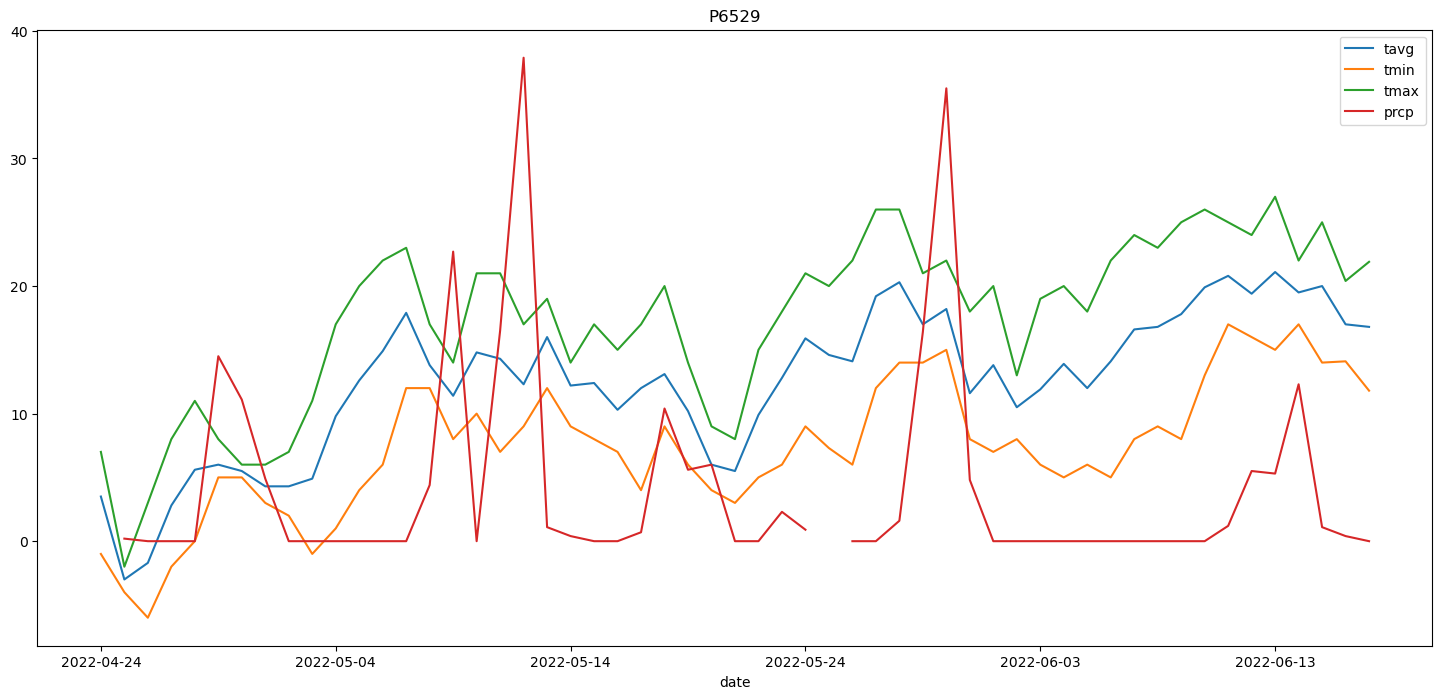

In [8]:
# Plot dataframe

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title(f"{code}")
df.plot(ax=ax)